In [1]:
############# live plotting #############
#info
#https://qcodes.github.io/Qcodes/examples/plotting/How-to-use-Plottr-with-QCoDeS-for-live-plotting.html
import time
import os
import numpy as np
import qcodes as qc
from qcodes.dataset import (
    Measurement,
    do1d,
    do2d,
    initialise_or_create_database_at,
    load_or_create_experiment,
)
import IPython.lib.backgroundjobs as bg
from plottr.apps import inspectr
from zhinst.qcodes import UHFLI
from zhinst.qcodes import MFLI
from qcodes import Parameter, Station
import matplotlib.pyplot as plt

local=r"H:\Uni\Physics\PhD\Year_2\CNT experiment\Fork\Code\Sweeper\TestData"

qc.logger.start_all_logging()

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\Hender12\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\Hender12\.qcodes\logs\231009-10276-qcodes.log


In [2]:
db_file_path = os.path.join(local, 'plottr_for_live_plotting_tutorial.db')
initialise_or_create_database_at(db_file_path)
exp = load_or_create_experiment(experiment_name='Experiment Name', sample_name="Air2D")

In [3]:
# Create an instance of UHFLI - the real instriment
lockin = UHFLI(name='lockin', serial='dev2436', host='localhost') # MFLI 7286
station = qc.Station(lockin)

2023-10-09 14:37:22,809 ¦ zhinst.toolkit.driver.devices.uhfli ¦ ERROR ¦ uhfli ¦ awgs ¦ 24 ¦ Missing option: AWG


In [4]:
meas = Measurement(exp=exp)
meas.register_parameter(lockin.oscs.freq)
meas.write_period = 0.1

In [5]:
jobs = bg.BackgroundJobManager()
jobs.new(inspectr.main, db_file_path)

<BackgroundJob #0: <function main at 0x00000243F7545B80>>

In [6]:
#set the voltage signal value
lockin.sigouts[0].imp50.set(0)
lockin.sigouts[0].amplitudes[3].value(0.5) #0.75 max
lockin.sigins[0].range(0.8)
lockin.demods[3].timeconstant(52.37e-3)

#Now turn on the measurement setup and turn on the voltage signal
lockin.sigouts[0].on(True)
lockin.demods[0].enable()

</dev2436/demods/0/enable.on: 1>

In [7]:
#2D sweeps of values
#frequency comands
lockin.oscs[0].freq.set #set freq
def frequencyget(): #Get freq
    return(lockin.snapshot()["submodules"]["oscs"]["channels"]["lockin_oscs0"]["parameters"]["freq"]["raw_value"])
#Here is the equivilent comand for measured amplitude x, y and r
def getampr():
    return(np.sqrt(float(lockin.demods[0].sample()["x"])**2+float(lockin.demods[0].sample()["y"])**2))
def gettheta():
    return(np.arctan2(float(lockin.demods[0].sample()["y"]),float(lockin.demods[0].sample()["x"])))
def gettime():
    elapsed = (time.process_time() - start)
    return(elapsed)

In [8]:
# Define a QCoDeS parameter for the frequency
#The commands get_cmD and set_cmd are wrong I believe this is why it is not taking data
frequency_parameter = Parameter('Frequency', get_cmd=frequencyget, set_cmd=lockin.oscs[0].freq.set)
Time_parameter = Parameter('Time',set_cmd=None, get_cmd=gettime)
Track_Time_parameter = Parameter('TrackTime', get_cmd=gettime)

Amplitude_parameterr = Parameter('R_Amplitude', get_cmd=getampr)
Theta_parameter = Parameter('Theta', get_cmd=gettheta)

Starting experimental run with id: 34. Using 'qcodes.dataset.do2d'


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

2023-10-09 14:37:38 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 485, in process
    dout = dd.datadict_to_meshgrid(data)

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ internals>", line 200, in amax

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\numpy\core\fromnumeric.

2023-10-09 14:37:41 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

2023-10-09 14:37:42 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

2023-10-09 14:37:42 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

2023-10-09 14:37:43 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

2023-10-09 14:37:43 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

2023-10-09 14:37:44 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

2023-10-09 14:37:44 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

2023-10-09 14:37:45 - plottr.node.grid.DataGridder.Grid - ERROR
    EXCEPTION RAISED: <class 'ValueError'>: zero-size array to reduction operation maximum which has no identity
 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\pyqtgraph\flowchart\Node.py", line 296, in update
    out = self.process(**strDict(vals))

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 504, in process
    raise err

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\node\grid.py", line 493, in process
    dout = dd.datadict_to_meshgrid(

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1188, in datadict_to_meshgrid
    newdata.validate()

 ->   File "C:\Users\Hender12\.conda\envs\qcodes\lib\site-packages\plottr\data\datadict.py", line 1047, in validate
    max_step_along_axes = np.max(np.abs(np.diff(data_items[na]['values'],axis=axis_num)))

 ->   File "<__array_function__ in

  0%|          | 0/100 [00:00<?, ?it/s]

2023-10-09 14:37:47,110 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:47,223 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:47,232 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:47,235 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:47,238 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:47,241 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:47,242 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:47,641 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:47,688 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:47,689 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:47,690 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:47,691 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:47,692 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:47,693 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:48,027 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,029 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,036 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,038 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,042 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,044 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,045 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:48,262 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,263 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,264 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,265 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,267 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,268 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,269 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:48,721 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,722 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,725 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,729 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,734 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:48,736 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:48,742 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:49,102 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:49,109 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:49,111 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:49,116 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:49,116 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:49,119 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:49,120 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:49,486 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:49,488 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:49,490 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:49,491 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:49,494 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:49,497 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:49,499 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:50,018 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,022 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,024 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,026 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,027 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,030 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,030 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:50,404 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,405 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,409 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,411 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,412 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,414 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,418 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:50,671 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,672 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,674 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,678 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,679 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:50,685 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:50,686 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:51,125 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,126 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,131 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,133 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,135 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,137 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,141 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:51,484 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,487 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,487 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,495 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,496 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,499 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,500 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:51,737 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,738 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,740 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,743 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,745 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:51,746 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:51,747 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:52,135 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,137 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,138 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,140 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,141 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,146 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,148 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:52,379 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,380 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,382 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,383 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,387 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,388 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,391 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:52,729 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,730 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,731 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,733 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,734 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:52,737 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:52,738 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:55,232 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,232 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:55,235 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,235 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:55,240 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,242 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:55,244 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:55,477 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:55,482 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,483 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:55,485 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,486 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:55,490 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,492 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:55,825 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,827 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:55,836 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:55,837 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:56,478 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:56,479 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:56,481 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:56,689 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:56,848 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:56,849 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:56,852 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:56,853 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:56,855 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:56,856 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:57,108 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,110 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,111 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,112 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,114 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,115 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,116 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:57,553 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,556 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,557 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,560 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,561 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,563 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,564 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:57,957 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,958 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,961 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,963 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,967 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:57,968 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:57,973 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:58,228 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:58,231 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:58,234 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:58,237 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:58,238 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:58,241 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:58,324 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:58,924 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,023 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,045 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,047 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,051 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,053 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,055 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:59,508 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,513 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,515 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,516 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,517 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,518 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,520 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:37:59,736 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,737 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,737 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,739 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,740 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:37:59,740 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:37:59,742 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:00,586 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:00,588 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:00,589 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:00,591 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:00,591 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:00,593 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:00,594 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:00,961 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:00,963 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:00,965 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:00,965 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:00,967 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:00,968 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:00,971 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:01,181 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:01,184 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:01,185 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:01,189 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:01,190 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:01,194 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:01,198 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:01,623 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:01,624 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:01,630 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:01,633 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:01,635 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:01,636 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:01,638 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:02,033 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:02,035 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:02,036 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:02,037 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:02,038 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:02,040 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:02,041 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:02,261 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:02,263 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:02,269 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:02,270 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:02,273 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:02,273 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:02,275 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:03,016 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,018 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,019 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,021 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,022 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,023 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,024 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:03,281 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,283 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,285 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,286 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,291 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,292 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,443 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:03,891 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,892 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,894 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,897 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,898 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:03,902 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:03,903 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:04,328 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:04,328 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:04,329 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:04,330 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:04,333 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:04,334 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:04,337 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:04,570 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:04,572 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:04,572 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:04,574 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:04,575 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:04,576 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:04,577 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:05,224 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,225 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,228 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,229 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,234 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,236 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,242 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:05,603 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,606 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,607 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,610 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,611 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,613 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,615 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:05,958 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,959 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,961 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,963 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,967 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:05,969 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:05,971 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:06,468 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:06,472 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:06,473 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:06,617 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:06,618 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:06,619 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:06,621 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:06,861 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:06,862 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:06,864 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:06,865 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:06,867 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:06,868 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:06,871 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:07,554 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:07,558 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:07,560 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:07,564 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:07,565 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:07,567 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:07,568 ¦ matplotlib.font_manager ¦ WARNIN

  0%|          | 0/100 [00:00<?, ?it/s]

2023-10-09 14:38:07,923 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:07,925 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:07,927 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:07,936 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:07,938 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:07,939 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:07,942 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:08,179 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:08,182 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:08,186 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:08,191 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:08,191 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:08,193 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:08,194 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:08,756 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:08,759 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:08,762 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:08,763 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:08,766 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:08,768 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:08,771 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:09,032 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:09,036 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:09,038 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:09,040 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:09,040 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:09,042 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:09,043 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:09,431 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:09,432 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:09,435 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:09,438 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:09,439 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:09,440 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:09,442 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:10,277 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:10,279 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:10,281 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:10,283 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:10,286 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:10,289 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:10,290 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:10,682 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:10,683 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:10,686 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:10,688 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:10,690 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:10,691 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:10,695 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:11,063 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:11,067 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:11,068 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:11,071 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:11,074 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:11,078 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:11,080 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:11,747 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:11,749 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:11,751 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:11,753 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:11,756 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:11,758 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:11,759 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:12,146 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:12,149 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:12,151 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:12,154 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:12,156 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:12,159 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:12,159 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:12,507 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:12,508 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:12,509 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:12,510 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:12,512 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:12,515 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:12,518 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:13,131 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,132 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,133 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,135 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,135 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,138 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,140 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:13,379 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,380 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,382 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,382 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,385 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,386 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,388 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:13,728 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,739 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,740 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,742 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,744 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:13,748 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:13,749 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:14,384 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,389 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,391 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,392 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,395 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,398 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,403 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:14,667 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,669 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,672 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,674 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,675 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,679 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,680 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:14,913 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,914 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,916 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,917 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,922 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:14,925 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:14,930 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:15,546 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:15,550 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:15,552 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:15,556 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:15,557 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:15,562 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:15,563 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:15,792 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:15,793 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:15,797 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:15,797 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:15,803 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:15,805 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:15,807 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:16,146 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:16,151 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:16,152 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:16,160 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:16,161 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:16,163 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:16,164 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:17,120 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,122 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,128 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,130 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,133 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,134 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,137 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:17,490 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,494 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,496 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,499 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,500 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,503 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,504 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:17,770 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,770 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,774 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,775 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,777 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:17,778 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:17,779 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:18,404 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:18,406 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:18,408 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:18,411 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:18,412 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:18,414 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:18,416 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:18,673 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:18,674 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:18,677 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:18,678 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:18,681 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:18,748 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:18,776 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:19,024 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,026 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,027 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,028 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,028 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,030 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,032 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:19,683 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,684 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,685 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,686 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,688 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,690 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,692 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:19,960 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,962 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,963 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,964 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,965 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:19,967 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:19,968 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:20,218 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:20,222 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:20,224 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:20,324 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:20,330 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:20,334 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:20,341 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:20,955 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:20,957 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:20,958 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:20,960 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:20,961 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:20,965 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:20,966 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:21,231 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:21,233 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:21,234 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:21,235 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:21,238 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:21,320 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:21,324 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:21,584 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:21,587 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:21,590 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:21,593 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:21,594 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:21,596 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:21,597 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:22,239 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,241 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,246 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,247 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,250 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,252 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,260 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:22,491 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,496 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,497 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,498 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,499 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,503 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,504 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:22,855 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,856 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,860 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,861 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:22,864 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:22,865 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,271 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:23,479 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,481 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:23,482 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,487 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:23,488 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,540 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:23,623 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:23,730 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:23,730 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,734 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:23,735 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,883 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:23,884 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,885 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:23,963 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:23,966 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:23,967 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:24,525 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:24,526 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:24,528 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:24,530 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:24,742 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:24,745 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:24,913 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:24,914 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:24,919 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:24,921 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:24,923 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:25,124 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:25,179 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:25,182 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:25,185 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:25,186 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:25,189 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:25,191 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:25,792 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:25,794 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:25,796 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:25,798 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:25,800 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:25,802 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:25,804 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:26,198 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:26,201 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:26,202 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:26,205 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:26,206 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:26,208 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:26,209 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:26,473 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:26,474 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:26,476 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:26,477 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:26,479 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:26,480 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:26,482 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:27,034 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,037 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,038 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,040 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,042 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,044 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,045 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:27,448 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,449 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,450 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,452 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,454 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,455 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,456 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:27,708 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,710 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,711 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,712 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,713 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:27,716 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:27,718 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:28,469 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:28,472 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:28,475 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:28,477 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:28,496 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:28,574 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:28,581 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:28,862 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:28,863 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:28,864 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:28,865 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:28,866 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:28,870 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:28,870 ¦ matplotlib.font_manager ¦ WARNIN

  0%|          | 0/100 [00:00<?, ?it/s]

2023-10-09 14:38:29,222 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:29,225 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:29,227 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:29,228 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:29,238 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:29,240 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:29,242 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:29,905 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:29,907 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:29,908 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:29,910 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:29,912 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:29,916 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:29,918 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:30,297 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:30,299 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:30,300 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:30,301 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:30,304 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:30,305 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:30,307 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:30,572 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:30,573 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:30,575 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:30,577 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:30,580 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:30,583 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:30,584 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:31,168 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,169 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,171 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,173 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,177 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,179 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,185 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:31,558 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,559 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,560 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,562 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,562 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,568 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,569 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:31,809 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,810 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,811 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,812 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,819 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:31,819 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:31,823 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:32,397 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:32,399 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:32,400 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:32,404 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:32,405 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:32,410 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:32,411 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:32,813 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:32,814 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:32,819 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:32,820 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:32,824 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:32,825 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:32,826 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:33,059 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:33,063 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:33,064 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:33,069 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:33,070 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:33,071 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:33,072 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:33,655 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:33,657 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:33,662 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:33,665 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:33,666 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:33,668 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:33,670 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:34,006 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,009 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,012 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,014 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,015 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,016 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,018 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:34,256 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,257 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,258 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,259 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,261 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,262 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,264 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:34,925 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,927 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,928 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,931 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,933 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:34,936 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:34,937 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:35,313 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:35,315 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:35,318 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:35,320 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:35,322 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:35,323 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:35,325 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:35,701 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:35,704 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:35,705 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:35,707 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:35,708 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:35,710 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:35,711 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:36,170 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,171 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,174 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,174 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,176 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,179 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,180 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:36,590 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,592 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,593 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,595 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,596 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,600 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,601 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:36,859 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,921 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,954 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,956 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,963 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:36,964 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:36,968 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:37,470 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:37,471 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:37,472 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:37,473 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:37,476 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:37,478 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:37,479 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:37,817 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:37,818 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:37,819 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:37,819 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:37,821 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:37,821 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:37,822 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:38,065 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:38,067 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:38,068 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:38,069 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:38,070 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:38,072 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:38,072 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:38,701 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:38,702 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:38,704 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:38,705 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:38,706 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:38,707 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:38,709 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:38,972 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,073 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,076 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,084 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,084 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,086 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,087 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:39,330 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,331 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,333 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,334 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,337 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,339 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,343 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:39,972 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,973 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,974 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,976 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,977 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:39,982 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:39,984 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:40,244 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:40,244 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:40,246 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:40,247 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:40,251 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:40,253 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:40,359 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:40,597 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:40,600 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:40,602 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:40,606 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:40,609 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:40,616 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:40,617 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:41,389 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:41,390 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:41,394 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:41,396 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:41,398 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:41,401 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:41,406 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:41,779 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:41,783 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:41,786 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:41,792 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:41,794 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:41,797 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:41,799 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:42,020 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:42,020 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:42,022 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:42,023 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:42,024 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:42,025 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:42,027 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:42,863 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:42,867 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:42,868 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:42,872 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:42,873 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:42,878 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:42,879 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:43,224 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:43,225 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:43,227 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:43,228 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:43,234 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:43,236 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:43,286 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:43,478 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:43,886 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:43,888 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:43,889 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:43,890 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:43,892 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:43,893 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:44,119 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,120 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,123 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,124 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,126 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,127 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,129 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:44,376 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,378 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,378 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,382 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,384 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,389 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,391 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:44,981 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,982 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,984 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,985 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,989 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:44,990 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:44,992 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:45,354 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:45,357 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:45,363 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:45,365 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:45,366 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:45,369 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:45,372 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:45,639 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:45,640 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:45,641 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:45,642 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:45,647 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:45,650 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:45,656 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:46,245 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,251 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,254 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,256 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,257 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,259 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,260 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:46,508 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,508 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,510 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,512 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,514 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,515 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,517 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:46,751 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,753 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,755 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,759 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,761 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:46,764 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:46,765 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:47,553 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:47,554 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:47,564 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:47,566 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:47,749 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:47,751 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:47,753 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:47,997 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:47,999 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,000 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,002 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,003 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,005 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,005 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:48,592 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,592 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,593 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,594 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,596 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,596 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,601 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:48,858 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,863 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,897 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,955 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,964 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:48,967 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:48,969 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:49,222 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:49,223 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:49,225 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:49,226 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:49,227 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:49,230 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:49,231 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:49,880 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:49,882 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:49,883 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:49,887 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:49,889 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:49,891 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:49,891 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:50,281 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:50,282 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:50,287 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:50,289 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:50,295 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:50,297 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:50,300 ¦ matplotlib.font_manager ¦ WARNIN

  0%|          | 0/100 [00:00<?, ?it/s]

2023-10-09 14:38:50,489 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:50,497 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:50,499 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:50,499 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:50,501 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:50,502 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:50,503 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:51,183 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,186 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,187 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,189 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,190 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,192 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,194 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:51,609 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,611 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,612 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,612 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,614 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,615 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,616 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:51,856 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,858 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,859 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,861 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,862 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:51,863 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:51,865 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:52,461 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:52,462 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:52,465 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:52,466 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:52,470 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:52,472 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:52,474 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:52,851 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:52,853 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:52,853 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:52,854 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:52,855 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:52,857 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:52,859 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:53,111 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:53,111 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:53,113 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:53,114 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:53,115 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:53,116 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:53,121 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:53,685 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:53,687 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:53,687 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:53,689 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:53,690 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:53,694 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:53,695 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:54,100 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,102 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,103 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,105 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,110 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,112 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,116 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:54,358 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,359 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,362 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,366 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,367 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,371 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,373 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:54,874 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,875 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,880 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,882 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,982 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:54,984 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:54,988 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:55,262 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:55,266 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:55,267 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:55,274 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:55,275 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:55,277 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:55,278 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:55,533 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:55,534 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:55,538 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:55,622 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:55,628 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:55,630 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:55,633 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:56,465 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:56,469 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:56,472 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:56,474 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:56,475 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:56,479 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:56,482 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:56,839 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:56,841 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:56,844 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:56,845 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:56,847 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:56,848 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:56,849 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:57,085 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:57,087 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:57,088 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:57,092 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:57,093 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:57,095 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:57,096 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:57,722 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:57,724 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:57,727 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:57,729 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:57,730 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:57,731 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:57,732 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:58,109 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,113 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,114 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,117 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,117 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,119 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,120 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:58,480 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,480 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,482 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,483 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,485 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,493 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,495 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:58,984 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,986 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,987 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,988 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,989 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:58,992 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:58,993 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:59,355 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:59,358 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:59,360 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:59,362 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:59,363 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:59,365 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:59,366 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:38:59,589 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:59,590 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:59,591 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:59,593 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:59,594 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:38:59,598 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:38:59,599 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:00,276 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:00,277 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:00,278 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:00,281 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:00,284 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:00,285 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:00,287 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:00,688 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:00,690 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:00,691 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:00,692 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:00,693 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:00,697 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:00,699 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:01,031 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,033 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,040 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,043 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,047 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,049 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,051 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:01,549 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,551 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,552 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,555 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,556 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,557 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,559 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:01,940 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,941 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,944 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,945 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,948 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:01,949 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:01,953 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:02,307 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:02,309 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:02,318 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:02,319 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:02,321 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:02,329 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:02,332 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:02,834 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:02,836 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:02,838 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:02,839 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:02,844 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:02,845 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:02,853 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:03,227 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:03,229 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:03,230 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:03,234 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:03,235 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:03,241 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:03,242 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:03,456 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:03,456 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:03,461 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:03,462 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:03,470 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:03,471 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:03,473 ¦ matplotlib.font_manager ¦ WARNIN

KeyboardInterrupt: 

2023-10-09 14:39:07,764 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:07,765 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:07,768 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:07,769 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:07,770 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:07,771 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:07,773 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:07,940 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:07,942 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:07,942 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:07,946 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:07,948 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:07,950 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:07,951 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:08,040 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,041 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,042 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,043 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,049 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,050 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,051 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:08,134 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,143 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,146 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,149 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,151 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,152 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,154 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:08,224 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,224 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,237 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,238 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,239 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,240 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,241 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:08,373 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,374 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,375 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,376 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,377 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,379 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,380 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:08,458 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,459 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,461 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,461 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.


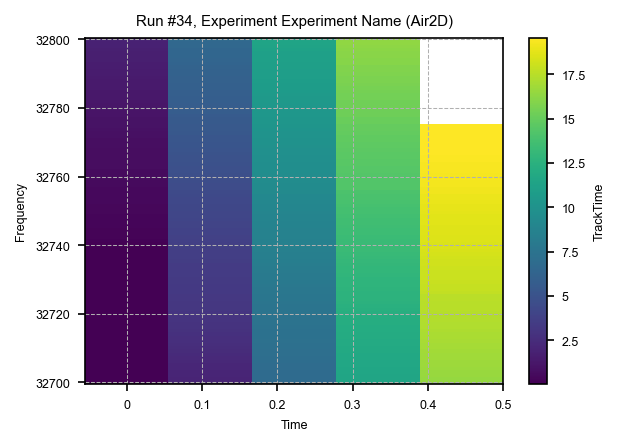

2023-10-09 14:39:08,550 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,552 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,553 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,554 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,555 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,556 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,557 ¦ matplotlib.font_manager ¦ WARNIN

2023-10-09 14:39:08,628 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,629 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,630 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,631 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,632 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,634 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,635 ¦ matplotlib.font_manager ¦ WARNIN

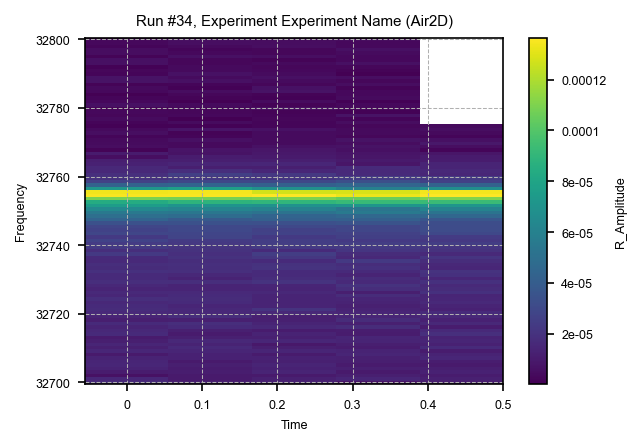

2023-10-09 14:39:08,749 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,751 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,752 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,754 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,756 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Helvetica' not found.
2023-10-09 14:39:08,756 ¦ matplotlib.font_manager ¦ WARNING ¦ font_manager ¦ _find_fonts_by_props ¦ 1338 ¦ findfont: Font family 'Bitstream Vera Sans' not found.
2023-10-09 14:39:08,758 ¦ matplotlib.font_manager ¦ WARNIN

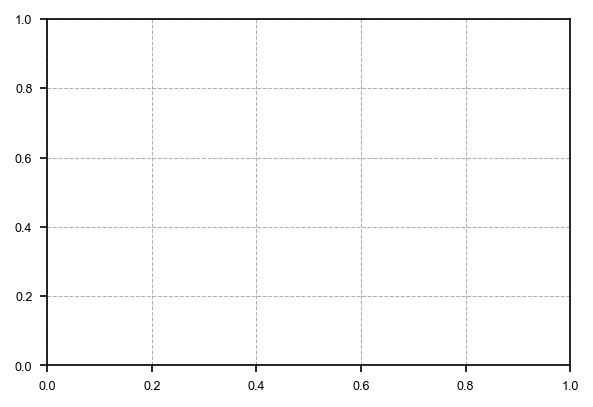

In [9]:
# Define the sweep range and other parameters
start_Time = 0
end_Time = 1
Time_num_points = 10
Time_delay = 0.1
#freq sweep
start_frequency = 32.7e3  # Hz
end_frequency = 32.8e3  # Hz
freq_num_points = 100
freq_delay=0.1

# Run the sweep
plt.rcParams["font.family"] = "Arial"
start = time.process_time()
do2d(
    Time_parameter,
    start_Time,
    end_Time,
    Time_num_points,
    Time_delay,
    frequency_parameter,
    start_frequency,
    end_frequency,
    freq_num_points,
    freq_delay,
    Track_Time_parameter,
    Amplitude_parameterr,
    Theta_parameter,
    write_period=0.1,
    do_plot=True,
    show_progress=True,
)

Starting experimental run with id: 36. Using 'qcodes.dataset.do1d'


  0%|          | 0/10 [00:00<?, ?it/s]

(results #36@H:\Uni\Physics\PhD\Year_2\CNT experiment\Fork\Code\Sweeper\TestData\plottr_for_live_plotting_tutorial.db
 --------------------------------------------------------------------------------------------------------------------
 Time - numeric
 TrackTime - numeric
 R_Amplitude - numeric
 Theta - numeric,
 (<Axes: title={'center': 'Run #36, Experiment Experiment Name (Air2D)'}, xlabel='Time', ylabel='TrackTime'>,
  <Axes: title={'center': 'Run #36, Experiment Experiment Name (Air2D)'}, xlabel='Time', ylabel='R_Amplitude'>,
  <Axes: title={'center': 'Run #36, Experiment Experiment Name (Air2D)'}, xlabel='Time', ylabel='Theta'>),
 (None, None, None))

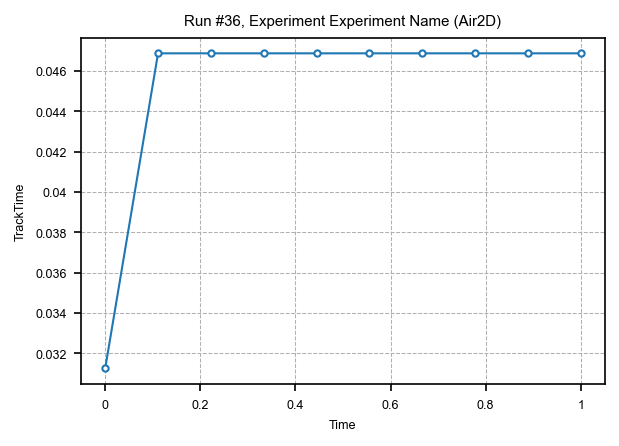

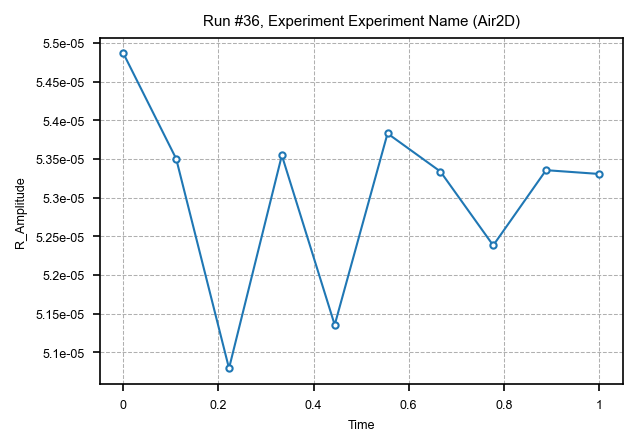

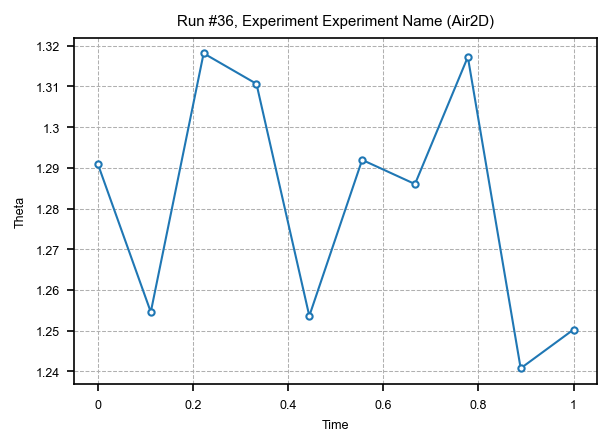

In [11]:
# Define the sweep range and other parameters
lockin.oscs[0].freq.set(32.75e3)

start_Time = 0
end_Time = 1
Time_num_points = 10
Time_delay = 0.1
#freq sweep
start_frequency = 32.7e3  # Hz
end_frequency = 32.8e3  # Hz
freq_num_points = 100
freq_delay=0.1

# Run the sweep
plt.rcParams["font.family"] = "Arial"
start = time.process_time()
do1d(
    Time_parameter,
    start_Time,
    end_Time,
    Time_num_points,
    Time_delay,
    Track_Time_parameter,
    Amplitude_parameterr,
    Theta_parameter,
    write_period=0.1,
    do_plot=True,
    show_progress=True,
)